In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [ ]:
theta,t,alpha,n,omega,N = sp.symbols('theta t alpha n omega N')
K,alpha,beta = sp.symbols('K alpha beta',real=True)
r = sp.IndexedBase('r', real = True)
eps = sp.IndexedBase('eps', real = True)
phi = sp.IndexedBase('phi', real = True)
Z = sp.symbols('Z')
R1 = (r[1,1]-r[1,2])/2
R2 = (r[2,1]-r[2,2])/2


dr11_dt = K/2 *(R1**2 *sp.cos(alpha)+beta**2*R2**2*sp.cos(alpha+2*phi) + 2*beta*R1*R2*sp.cos(alpha+phi)-sp.cos(alpha)/(2*N)*(r[1,1]**2+r[1,2]**2)-beta**2*sp.cos(alpha+2*phi)/(2*N)*(r[2,1]**2+r[2,2]**2))*(r[1,1]-r[1,1]**3)-K/(2*N)*(R1*sp.cos(alpha)+beta*R2*sp.cos(alpha+phi))*(1-r[1,1]**2)
dr12_dt = K/2 *(R1**2 *sp.cos(alpha)+beta**2*R2**2*sp.cos(alpha+2*phi) + 2*beta*R1*R2*sp.cos(alpha+phi)-sp.cos(alpha)/(2*N)*(r[1,1]**2+r[1,2]**2)-beta**2*sp.cos(alpha+2*phi)/(2*N)*(r[2,1]**2+r[2,2]**2))*(r[1,2]-r[1,2]**3)-K/(2*N)*(R1*sp.cos(alpha)+beta*R2*sp.cos(alpha+phi))*(1-r[1,2]**2)
dr21_dt = K/2 *(R2**2 *sp.cos(alpha)+beta**2*R1**2*sp.cos(alpha-2*phi) + 2*beta*R2*R1*sp.cos(alpha-phi)-sp.cos(alpha)/(2*N)*(r[2,1]**2+r[2,2]**2)-beta**2*sp.cos(alpha-2*phi)/(2*N)*(r[1,1]**2+r[1,2]**2))*(r[2,1]-r[2,1]**3)-K/(2*N)*(R2*sp.cos(alpha)+beta*R1*sp.cos(alpha-phi))*(1-r[2,1]**2)
dr22_dt = K/2 *(R2**2 *sp.cos(alpha)+beta**2*R1**2*sp.cos(alpha-2*phi) + 2*beta*R2*R1*sp.cos(alpha-phi)-sp.cos(alpha)/(2*N)*(r[2,1]**2+r[2,2]**2)-beta**2*sp.cos(alpha-2*phi)/(2*N)*(r[1,1]**2+r[1,2]**2))*(r[2,2]-r[2,2]**3)-K/(2*N)*(R2*sp.cos(alpha)+beta*R1*sp.cos(alpha-phi))*(1-r[2,2]**2)

dpsi1_dt = omega-sp.sin(alpha)/N**2 - K/2*(R1**2*sp.sin(alpha)+beta**2*R2**2*sp.sin(alpha+2*phi)-1/N*(r[1,1]**2+r[1,2]**2)*sp.sin(alpha)-beta**2/N*(r[2,1]**2+r[2,2]**2)*sp.sin(alpha+2*phi))*(1+r[1,1]**2) - K/(2*N*r[1,1])*(R1*sp.sin(alpha)+beta*R2*sp.sin(alpha+phi))*(1+r[1,1])
dpsi2_dt = omega-sp.sin(alpha)/N**2 + K/2*(R2**2*sp.sin(alpha)+beta**2*R1**2*sp.sin(alpha-2*phi)-1/N*(r[2,1]**2+r[2,2]**2)*sp.sin(alpha)-beta**2/N*(r[1,1]**2+r[1,2]**2)*sp.sin(alpha-2*phi))*(1+r[2,1]**2) + K/(2*N*r[2,1])*(R2*sp.sin(alpha)+beta*R1*sp.sin(alpha-phi))*(1+r[2,1])
dphi_dt = dpsi1_dt - dpsi2_dt


In [ ]:
dR_dt = dr21_dt.subs([(r[1,2],1),(r[1,1],1),(r[2,2],r[2,1])])
sol_r = sp.solve(dR_dt,r[2,1])[4]
sol_r

beta*sqrt(-cos(alpha - 2*phi)/cos(alpha))

In [ ]:
dR_dt

K*(-beta**2*cos(alpha - 2*phi)/N - cos(alpha)*r[2, 1]**2/N)*(-r[2, 1]**3 + r[2, 1])/2

In [ ]:
SUB_dphi = dphi_dt.subs([(r[1,2],1),(r[1,1],1),(r[2,2],r[2,1])])
SUB_dphi.collect(r[2,1])

-K*(-2*beta**2*sin(alpha - 2*phi)/N - 2*sin(alpha)*r[2, 1]**2/N)*(r[2, 1]**2 + 1)/2 - K*(-2*beta**2*sin(alpha + 2*phi)*r[2, 1]**2/N - 2*sin(alpha)/N)

In [ ]:
dR_dt.simplify()

K*(beta**2*cos(alpha - 2*phi) + cos(alpha)*r[2, 1]**2)*(r[2, 1]**2 - 1)*r[2, 1]/(2*N)

In [ ]:
sub_Z = dphi_dt.subs([(r[1,2],1),(r[1,1],1),(r[2,2],r[2,1])]).subs(r[2,1],Z).simplify()
dphi_r = sub_Z.subs(Z,sol_r)

In [ ]:
sub_Zn,sub_Zd = sp.fraction(sub_Z)

In [ ]:
n,d = sp.fraction(dphi_r.simplify())

In [ ]:
print(n.simplify())

K*(-2*beta**4*sin(alpha + 2*phi)*cos(alpha)*cos(alpha - 2*phi) + beta**2*(beta**2*cos(alpha - 2*phi) - cos(alpha))*sin(2*phi) + 2*sin(alpha)*cos(alpha)**2)


In [ ]:
def dphi_0(phi,alpha,beta):
    Z2 = beta**2 * (-np.cos(alpha - 2*phi)/np.cos(alpha))
    phi_0 = (2*Z2*beta**2*np.sin(alpha + 2*phi) - (Z2 + 1)*(Z2*np.sin(alpha) + beta**2*np.sin(alpha - 2*phi)) + 2*np.sin(alpha))    
    return phi_0

In [ ]:
# def dphi_0(phi,alpha,beta):
#     Z2 = beta**2 * (-np.cos(alpha - 2*phi)/np.cos(alpha))
#     phi_0 = -(2*np.sin(alpha)+2*beta**2*Z2) + (beta**2*(1+Z2)*np.sin(alpha-2*phi)+Z2*(1+Z2)*np.sin(alpha))   
#     return phi_0

def get_R(phi,alpha,beta):
    R = beta*np.sqrt(-np.cos(alpha - 2*phi)/np.cos(alpha))
    return R

def get_R2(phi,alpha,beta):
    R2 = beta**2 * (-np.cos(alpha - 2*phi)/np.cos(alpha))
    return R2

![image.png](attachment:image.png)

In [ ]:
Beta = 0.3
Alpha = 0.8

In [ ]:
initial_guesses = np.linspace(-np.pi,np.pi, 10)
solutions = set()
for guess in initial_guesses:
    solution = fsolve(dphi_0, guess,args=(Alpha,Beta))
    # if np.isclose(dphi_0(solution,Alpha,Beta), 0):
    if (solution<=np.pi) and (solution>0):
        solutions.add(round(solution[0], 7))  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


In [ ]:
solutions, get_R2(solution,Alpha,Beta)

({2.2522345}, array([0.10971335]))

In [ ]:
get_R2(np.array(list(solutions)),Alpha,Beta)

array([0.1092499])

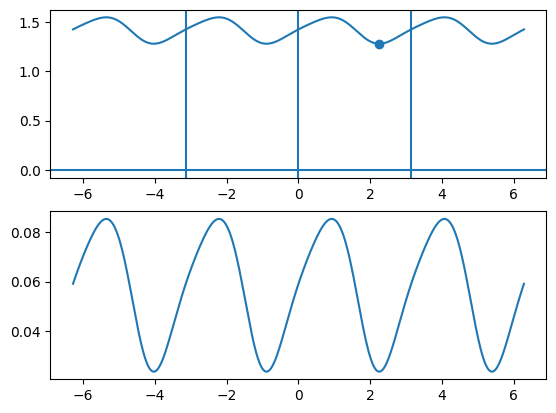

In [ ]:
xs = np.linspace(-2*np.pi,2*np.pi, 10000)
Phi = dphi_0(xs,Alpha,Beta)
plt.subplot(211)
plt.plot(xs,Phi)
for sol in solutions:
    plt.scatter(sol,dphi_0(sol,Alpha,Beta))
plt.axhline()
plt.axvline(np.pi)
plt.axvline(-np.pi)
plt.axvline(0)

plt.subplot(212)
plt.plot(xs,get_R2(Phi,Alpha,Beta))




In [ ]:
from mpmath import findroot

In [ ]:
Alphas = np.linspace(0,np.pi/2,20)[1:]
Betas = np.linspace(0,1,20)[1:]

AA,BB = np.meshgrid(Alphas,Betas)
LENS = np.nan*np.ones_like(AA)

In [ ]:
LENS[0].shape

(19,)

In [ ]:

initial_guesses = np.linspace(-np.pi,np.pi, 100)  # 초기 추정값들의 배열


Alpha = 0.0
Beta = 0.8
Alphas = np.linspace(0,np.pi/2,50)[:]
Betas = np.linspace(0,1,50)[1:]

AA,BB = np.meshgrid(Alphas,Betas)
Qs_dict = {}
Rs_dict = {}
Ps_dict = {}
Len_dict = {}

for Alpha in Alphas:
    for Beta in Betas:
        solutions = set()
        for guess in initial_guesses:
            solution = fsolve(dphi_0, guess,args=(Alpha,Beta))
            if np.isclose(dphi_0(solution,Alpha,Beta), 0):
                if (solution<=np.pi) and (solution>0):
                    solutions.add(round(solution[0], 7))  
            
        Rs = []
        Qs = []
        phis = []

        for psi in solutions:
            R2 = get_R2(psi,Alpha,Beta)
            if (R2>0)and(R2<=1):
                R = get_R(psi,Alpha,Beta)
                Rs.append(R)
                Qs.append(R2)
                phis.append(psi)
        Rs_dict[Alpha,Beta],Qs_dict[Alpha,Beta],Ps_dict[Alpha,Beta]  = map(np.array,[Rs,Qs,phis])

In [ ]:
KA = []
KB = []
MAX_Q,MIN_Q,Lens = [],[],[]
Mean_Q = []
Std_Q = []
for (k_alpha,k_beta),Qs in Qs_dict.items():
    if Qs.shape[0]>0:
        KA.append(k_alpha)
        KB.append(k_beta)
        if Qs.shape[0]>1:
            MAX_Q.append(np.max(Qs))
            MIN_Q.append(np.min(Qs))
        else:
            MAX_Q.append(np.max(Qs))
            MIN_Q.append(np.nan)
        Mean_Q.append(np.mean(Qs))
        Std_Q.append(np.std(Qs))
        Lens.append(Qs.shape[0])
    else:
        # print(k_alpha,k_beta)
        KA.append(k_alpha)
        KB.append(k_beta)
        MAX_Q.append(np.nan)
        MIN_Q.append(np.nan)
        Mean_Q.append(np.nan)
        Std_Q.append(np.nan)
        Lens.append(np.nan) 
MAX_Q,MIN_Q,Mean_Q,Std_Q,Lens = map(np.array,[MAX_Q,MIN_Q,Mean_Q,Std_Q,Lens])     


In [ ]:
HQ = MAX_Q.reshape(len(Alphas),-1).T
LQ = MIN_Q.reshape(len(Alphas),-1).T

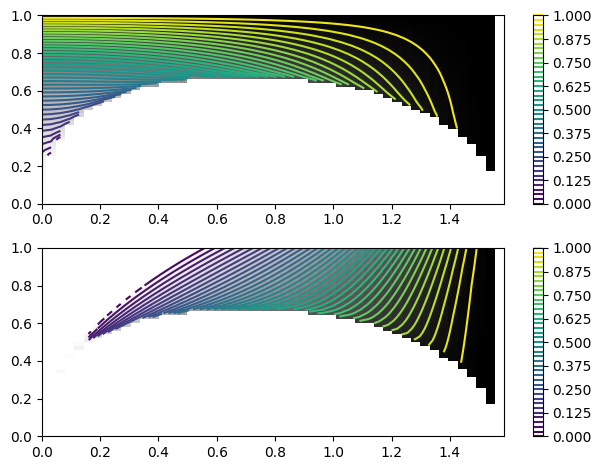

In [ ]:
# plt.imshow(MAX_Q.reshape(AA.shape))
# plt.imshow(MIN_Q.reshape(AA.shape))
# plt.pcolormesh(AA,BB,Lens.reshape(len(Betas),len(Alphas)))
# plt.pcolormesh(AA,BB,MAX_Q.reshape(AA.shape))
plt.subplot(211)
plt.pcolormesh(AA,BB,HQ,vmin=0,vmax=1,cmap='gray_r')

plt.contour(AA,BB,HQ,levels=41)
# plt.contour(AA,BB,LQ,levels=41)
plt.xlim(0,)
plt.ylim(0,1)
plt.colorbar()

plt.subplot(212)
plt.pcolormesh(AA,BB,LQ,vmin=0,vmax=1,cmap='gray_r')
plt.contour(AA,BB,LQ,levels=41)
plt.xlim(0,)
plt.ylim(0,1)
plt.colorbar()

# plt.subplot(313)
# plt.pcolormesh(AA,BB,HQ-LQ)
# plt.colorbar()

plt.tight_layout()

# plt.pcolormesh(AA,BB,Std_Q.reshape(AA.shape))

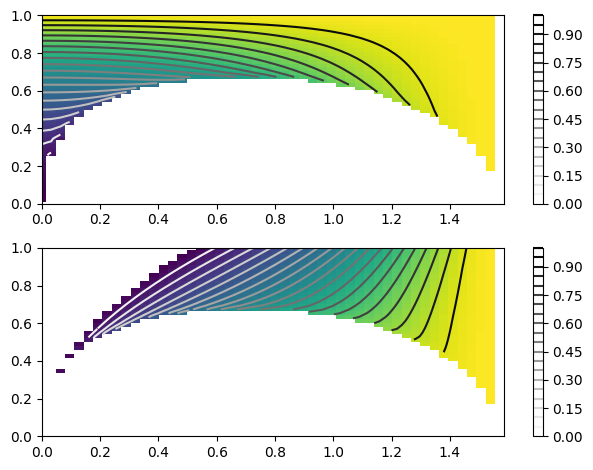

In [ ]:
# plt.imshow(MAX_Q.reshape(AA.shape))
# plt.imshow(MIN_Q.reshape(AA.shape))
# plt.pcolormesh(AA,BB,Lens.reshape(len(Betas),len(Alphas)))
# plt.pcolormesh(AA,BB,MAX_Q.reshape(AA.shape))
plt.subplot(211)
plt.pcolormesh(AA,BB,HQ,vmin=0,vmax=1)
plt.contour(AA,BB,HQ,levels=21,cmap='gray_r')
# plt.contour(AA,BB,LQ,levels=41)
plt.xlim(0,)
plt.ylim(0,1)
plt.colorbar()

plt.subplot(212)
plt.pcolormesh(AA,BB,LQ,vmin=0,vmax=1)
plt.contour(AA,BB,LQ,levels=21,cmap='gray_r')
plt.xlim(0,)
plt.ylim(0,1)
plt.colorbar()

# plt.subplot(313)
# plt.pcolormesh(AA,BB,HQ-LQ)
# plt.colorbar()

plt.tight_layout()

# plt.pcolormesh(AA,BB,Std_Q.reshape(AA.shape))

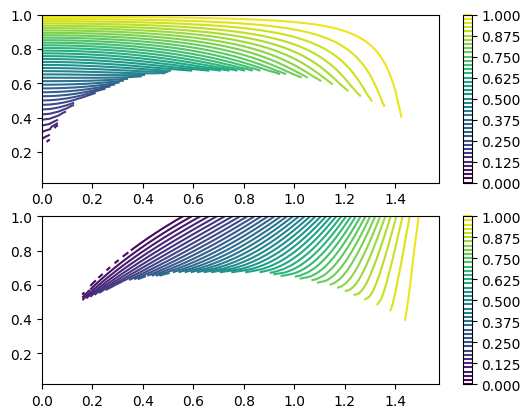

In [ ]:
plt.subplot(211)
plt.contour(AA,BB,HQ,levels=41)
plt.colorbar()

plt.subplot(212)
plt.contour(AA,BB,LQ,levels=41)
plt.colorbar()

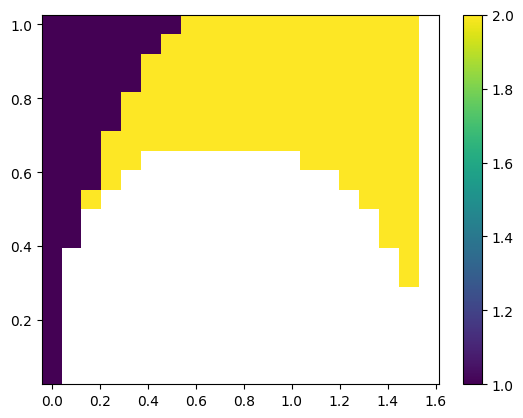

In [ ]:
plt.pcolormesh(AA,BB,Lens.reshape(20,-1).T)
plt.colorbar()

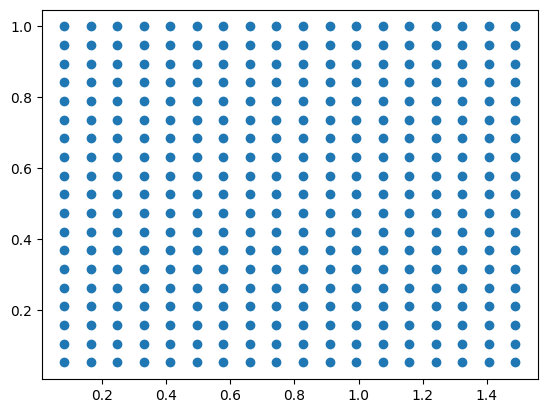

In [ ]:
plt.scatter(KA,KB)

In [ ]:
Ns = np.linspace(1,1000,1000)
t_c = np.arcsin(1/Ns)


[]

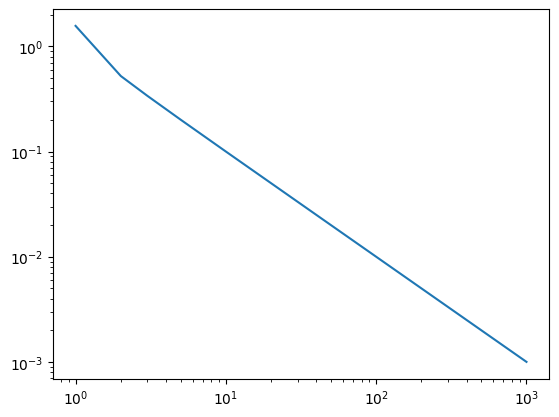

In [ ]:
plt.plot(Ns,t_c)
plt.loglog()


# check_simulation

In [25]:
def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n,len(y0)))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y


In [26]:
def df_dt(Z,t,alpha,beta,K,N):
    r,phi = Z
    dr = -K/N*(r**2*np.cos(alpha) - beta**2*np.cos(alpha+2*phi))*(r-r**3)
    dphi = K/N*(2*np.sin(alpha)+2*beta*r**2*np.sin(alpha+2*phi)+(1+r**2)*(beta**2*np.sin(alpha-2*phi) + r**2*np.sin(alpha)))
    return np.array([dr,dphi])

In [27]:
u0 = np.array([0.3,0.8])

In [28]:
beta = 0.4
alpha = 0.2
K = 1
N = 50

In [29]:
p = np.pi
-beta**2 * np.cos(alpha+2*p)/np.cos(alpha)

-0.16000000000000003

In [30]:
t = np.linspace(0,10000,30000)
u = RK4(df_dt,u0.flatten(),t,args=(alpha,beta,K,N))

In [31]:
Rs,Phis = u.T

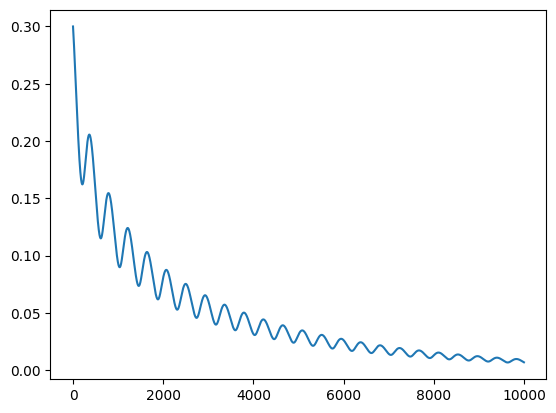

In [32]:
plt.plot(t,Rs)
# plt.plot(t,Phis)

In [453]:
@jit(nopython=True)
def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n,len(y0)))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y

@jit(nopython=True)
def dZ_dt(Zs,t,alpha,beta,eta1,eta2):
    a1real,a1imag,b1real,b1imag,a2real,a2imag,b2real,b2imag = Zs
    a1 = a1real + 1j*a1imag
    a2 = a2real + 1j*a2imag
    b1 = b1real + 1j*b1imag
    b2 = b2real + 1j*b2imag
    Z11 = 1/2 * (np.conj(a1)+np.conj(b1)) + eta1/2 * (np.conj(a1)-np.conj(b1))
    Z12 = 1/2 * (np.conj(a2)+np.conj(b2)) + eta2/2 * (np.conj(a2)-np.conj(b2))
    H1 = Z11**2 + 2*beta*Z11*Z12 + beta**2*Z12**2
    H2 = Z12**2 + 2*beta*Z11*Z12 + beta**2*Z11**2
    
    da1 = 1/2 *(np.conj(H1)*np.conj(a1)*np.exp(1j*alpha) - H1*a1**3*np.exp(-1j*alpha) )
    db1 = 1/2 *(np.conj(H1)*np.conj(b1)*np.exp(1j*alpha) - H1*b1**3*np.exp(-1j*alpha) )
    da2 = 1/2 *(np.conj(H2)*np.conj(a2)*np.exp(1j*alpha) - H1*a2**3*np.exp(-1j*alpha) )
    db2 = 1/2 *(np.conj(H2)*np.conj(b2)*np.exp(1j*alpha) - H1*b2**3*np.exp(-1j*alpha) )
    return np.array([da1.real,da1.imag,db1.real,db1.imag,da2.real,da2.imag,db2.real,db2.imag])

In [454]:
A1 = 1
A2 = 0.5

a1 =  A1 *np.exp(0j)
b1 =  a1 * np.exp(np.pi*1j)
a2 =  A2*np.exp(0.0j)
b2 =  a2 * np.exp(np.pi*1j)

In [455]:
t = np.arange(0,10000,0.1)
alpha =  0.9
beta = 0.8
eta1 = 0.1
eta2 = 0.05
Zs = RK4(dZ_dt,np.array([a1.real,a1.imag,b1.real,b1.imag,a2.real,a2.imag,b2.real,b2.imag]),t,args=(alpha,beta,eta1,eta2))

In [458]:
def to_complex(Zs):
    a1real,a1imag,b1real,b1imag,a2real,a2imag,b2real,b2imag = Zs.T
    a1 = a1real + 1j*a1imag
    a2 = a2real + 1j*a2imag
    b1 = b1real + 1j*b1imag
    b2 = b2real + 1j*b2imag
    return a1,b1,a2,b2
a1s,b1s,a2s,b2s = to_complex(Zs)

In [459]:
RZ1s = 1/2 * (np.conj(a1s)+np.conj(b1s)) + eta1/2 * (np.conj(a1s)-np.conj(b1s))
QZ1s = 1/2 * (np.conj(a1s)**2+np.conj(b1s)**2) + eta1/2 * (np.conj(a1s)**2-np.conj(b1s)**2)


RZ2s = 1/2 * (np.conj(a2s)+np.conj(b2s)) + eta2/2 * (np.conj(a2s)-np.conj(b2s))
QZ2s = 1/2 * (np.conj(a2s)**2+np.conj(b2s)**2) + eta2/2 * (np.conj(a2s)**2-np.conj(b2s)**2)

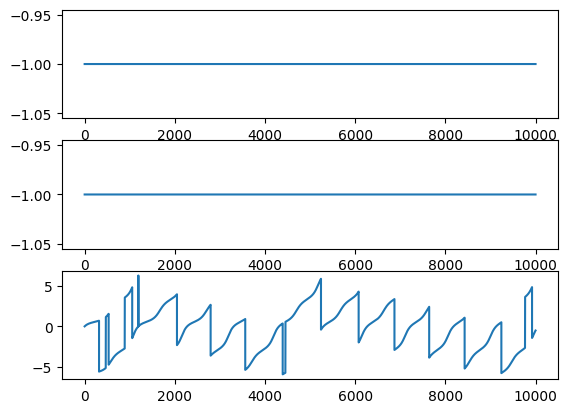

In [460]:
plt.subplot(311)

plt.plot(t,np.cos(np.angle(a1s)-np.angle(b1s)))
# plt.plot(t,)


plt.subplot(312)
plt.plot(t,np.cos(np.angle(a2s)-np.angle(b2s)))


plt.subplot(313)
plt.plot(t,np.angle(a1s)-np.angle(a2s))
# plt.plot(t,abs(QZ1s))
# plt.plot(t,abs(QZ2s))

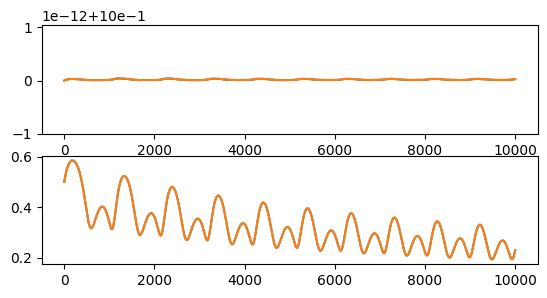

In [461]:
plt.subplot(311)
plt.plot(t,np.abs(a1s))
plt.plot(t,np.abs(b1s))
# plt.plot(t,)


plt.subplot(312)
plt.plot(t,np.abs(a2s))
plt.plot(t,np.abs(b2s))

# plt.plot(t,abs(QZ1s))
# plt.plot(t,abs(QZ2s))

(0.0, 1.1)

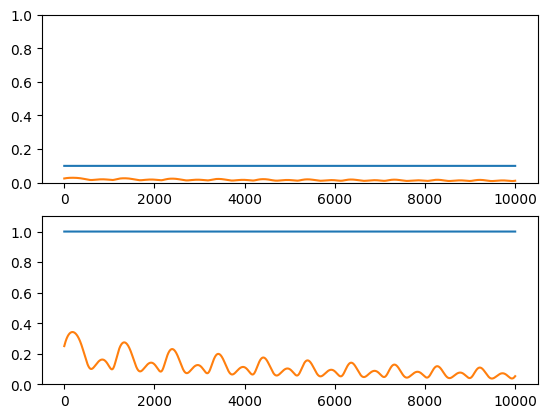

In [462]:
plt.subplot(211)

plt.plot(t,abs(RZ1s))
plt.plot(t,abs(RZ2s))
plt.ylim(0,1)


plt.subplot(212)
plt.plot(t,abs(QZ1s))
plt.plot(t,abs(QZ2s))
plt.ylim(0,1.1)

# COMPARE with numerical simulation

In [279]:
import functools
import numpy as np
from scipy.optimize import root_scalar
from scipy import stats
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

def _vectorize_float(f):
    vectorized = np.vectorize(f, otypes=[float], signature="(),()->()")

    @functools.wraps(f)
    def wrapper(*args):
        return vectorized(*args)

    return wrapper


class MixtureDistribution:
    def __init__(self, distributions, weights):
        self._distributions = list(distributions)
        self._weights = list(weights)

        if not (all(w >= 0 for w in self._weights) and sum(self._weights) == 1):
            raise ValueError("Invalid weight vector.")

        if len(self._distributions) != len(self._weights):
            raise ValueError("Mixtures and weights must have the same length.")

        if len(self._distributions) < 2:
            raise ValueError("Must have at least two component distributions.")

    @_vectorize_float
    def pdf(self, x):
        return sum(w * d.pdf(x) for w, d in zip(self._weights, self._distributions))

    @_vectorize_float
    def cdf(self, x):
        return sum(w * d.cdf(x) for w, d in zip(self._weights, self._distributions))

    @_vectorize_float
    def ppf(self, p):
        bracket = [min(dist.ppf(p) for dist in self._distributions),
                   max(dist.ppf(p) for dist in self._distributions)]

        r = root_scalar(
            f=lambda x: self.cdf(x) - p,
            fprime=self.pdf,
            bracket=bracket,
            x0=0
        )
        assert r.converged
        return r.root
    # https://www.jamesatkins.com/posts/quantile-function-of-mixture-distributions-in-python/

In [8]:
sigmas = np.linspace(0,5,81)

In [10]:
from parfor import parfor

In [280]:
sigmas = np.logspace(-100,np.log10(5),5000)
N = 500
ps = (np.arange(N+1)[:-1] + 1)/(N+1)

In [281]:
@parfor(sigmas,args=(ps,))
def get_Rs(sigma,ps):
    Theta = stats.norm(0,sigma).ppf(ps)
    R1 = np.abs(np.mean(np.exp(1j*Theta)))
    Q1 = np.abs(np.mean(np.exp(2j*Theta)))
    return R1, Q1

  0%|          | 0/5000 [00:00<?, ?it/s]

In [282]:
Theta = stats.norm(0,2).ppf(ps)

In [283]:
RS,QS  = map(np.array,zip(*get_Rs))

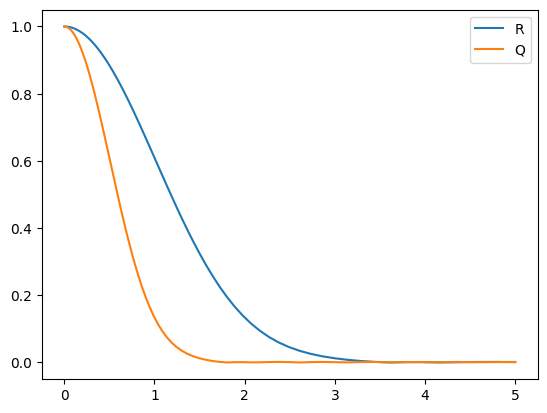

In [284]:
plt.plot(sigmas,RS,label='R')
plt.plot(sigmas,QS,label='Q')
plt.legend()

In [334]:
def dist(x,a,eta):
    a_ = a*np.exp(1j*x)/(1-a*np.exp(1j*x))
    b_ = -a*np.exp(1j*x)/(1+a*np.exp(1j*x))
    f = 1/(2*np.pi) * (1+ (1/2+eta/2)*(a_+a_.conjugate())+ (1/2-eta/2)*(b_+b_.conjugate()))# + np.conj(c_))
    return f

In [404]:
get_R_S = interp1d(RS,sigmas,kind='linear',bounds_error=False)
get_Q_S = interp1d(QS,sigmas,kind='linear',bounds_error=False)

In [432]:
sigma1 = get_Q_S(A1**2)
sigma2 = get_Q_S(A2**2)

eta1 = 0.1
eta2 = 0.05
shift = 0*np.pi/8
m1 = MixtureDistribution([stats.norm(0,sigma1), stats.norm(np.pi,sigma1)], [1/2 + eta1/2, 1/2 - eta1/2])
m2 = MixtureDistribution([stats.norm(0+shift,sigma2), stats.norm(np.pi+shift,sigma2)], [1/2 + eta2/2, 1/2 - eta2/2])

In [226]:
m1.ppf(0.1)

array(-6.42763442e-05)

In [433]:
N = 500
ps = (np.arange(N+1)[:-1] + 1)/(N+1)
thetas = m1.ppf(ps)%(np.pi*2)

In [434]:
x = np.linspace(0,2*np.pi,50000)
Fx = np.cumsum(abs(dist(x,0.4,eta1))) * (x[1]-x[0])
QF = interp1d(Fx,x,kind='linear',bounds_error=False)

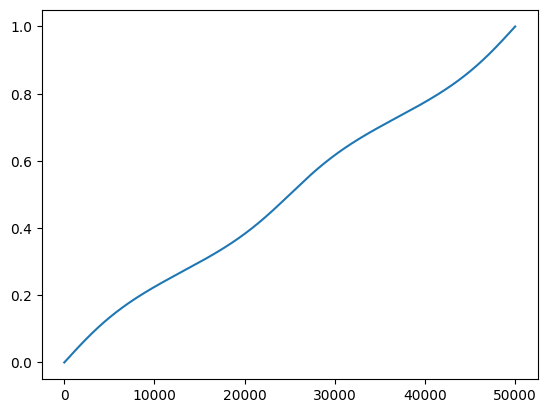

In [435]:
plt.plot(Fx)

In [436]:
pps = np.linspace(0,1,5001)[1:]
pps[np.isnan(QF(pps))]

array([], dtype=float64)

In [437]:
np.abs(np.nanmean(np.exp(2j*QF(pps))))

0.1599999995813729

DATA 확인해 보기

(array([8., 7., 8., 7., 7., 8., 7., 7., 8., 7., 8., 7., 7., 8., 7., 7., 8.,
        7., 7., 7., 8., 7., 7., 7., 8., 7., 7., 7., 7., 7., 8., 7., 7., 7.,
        7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 6., 7., 7., 7., 7.,
        6., 7., 7., 6., 7., 7., 6., 7., 6., 7., 6., 7., 6., 7., 6., 7., 6.,
        6., 7., 6., 6., 6., 7., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
        6., 6., 6., 6., 5., 6., 6., 6., 5., 6., 6., 5., 6., 6., 5., 6., 5.,
        6., 5., 6., 5., 5., 6., 5., 5., 6., 5., 5., 5., 6., 5., 5., 5., 5.,
        5., 5., 5., 6., 5., 5., 5., 4., 5., 5., 5., 5., 5., 5., 5., 4., 5.,
        5., 5., 4., 5., 5., 4., 5., 5., 4., 5., 4., 5., 4., 5., 4., 5., 4.,
        5., 4., 5., 4., 4., 5., 4., 4., 5., 4., 4., 5., 4., 4., 4., 5., 4.,
        4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5.,
        3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4.,
        4., 4., 4., 3., 4., 4., 4., 4., 3., 4., 4., 4., 3., 4., 4., 4., 3.,
        4., 

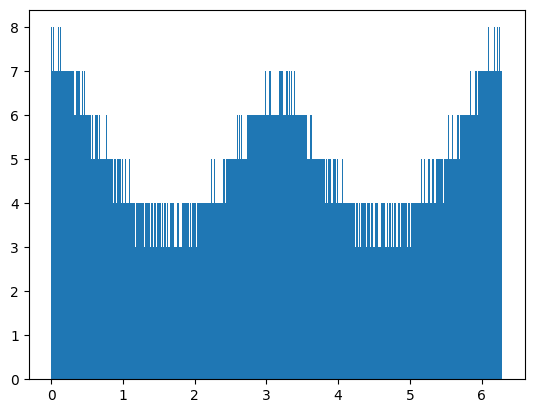

In [438]:
plt.hist(QF(pps),bins=1000)

In [439]:
N = 500
ps = (np.arange(N+1)[:-1] + 1)/(N+1)
theta1 = m1.ppf(ps)
theta2 = m2.ppf(ps)
Theta = np.r_[theta1,theta2]

Q2_init = np.mean(np.exp(2j*theta2))
print(abs(Q2_init),np.angle(Q2_init))

0.25014533609862133 0.00010351722877212763


(array([275.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 225.]),
 array([-2.11360838e-08,  3.14159248e-01,  6.28318518e-01,  9.42477787e-01,
         1.25663706e+00,  1.57079633e+00,  1.88495560e+00,  2.19911487e+00,
         2.51327414e+00,  2.82743340e+00,  3.14159267e+00]),
 <BarContainer object of 10 artists>)

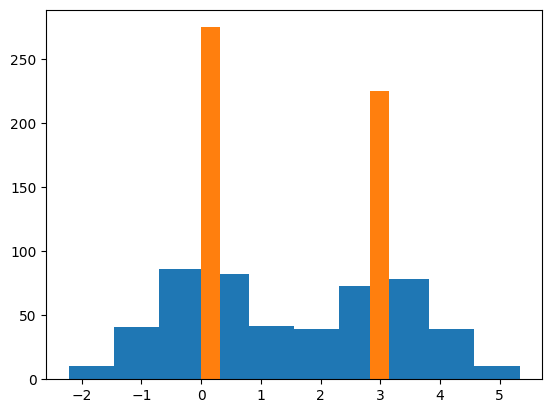

In [440]:
plt.hist(theta2)
plt.hist(theta1)

## Q1. 해당 분포로 regular sampling 을 하면 어떤 결과를 얻는가?

In [441]:
G10 = m2.pdf(0)
G11 = m2.pdf(np.pi)

Text(0, 0.5, 'Density')

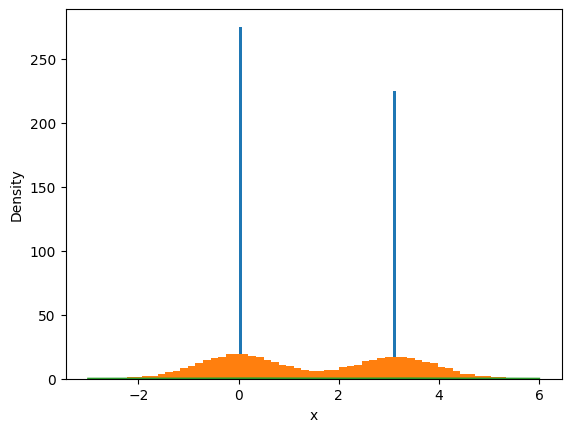

In [442]:
plt.hist(theta1,bins=50,density=False)
plt.hist(theta2,bins=50,density=False)
# plt.axhline((1/2+eta1/2)*N,ls= '--')
# plt.axhline((1/2-eta1/2)*N,ls= '--')

# plt.axhline(G10,ls= '--',color='tab:orange')
# plt.axhline(G11,ls= '--',color='tab:orange')


xs = np.linspace(-3,6,1000)
# plt.plot(xs,m1.pdf(xs))
plt.plot(xs,m2.pdf(xs))
plt.xlabel('x')
plt.ylabel('Density')

In [443]:
a1 =  0.9*np.exp(0j)
b1 =  a1 * np.exp(np.pi*1j)

a2 =  0.6*np.exp(0.2j)
b2 =  a2 * np.exp(np.pi*1j)

In [444]:
t = np.arange(0,20000,0.1)
alpha =  0.5
beta = 0.5
eta1 = 0.1
eta2 = 0
Zs = RK4(dZ_dt,np.array([a1,b1,a2,b2]),t,args=(alpha,beta,eta1,eta2))

In [324]:
a1s,b1s,a2s,b2s = Zs.T

In [325]:
RZ1s = 1/2 * (np.conj(a1s)+np.conj(b1s)) + eta1/2 * (np.conj(a1s)-np.conj(b1s))
QZ1s = 1/2 * (np.conj(a1s)**2+np.conj(b1s)**2) + eta1/2 * (np.conj(a1s)**2-np.conj(b1s)**2)


RZ2s = 1/2 * (np.conj(a2s)+np.conj(b2s)) + eta2/2 * (np.conj(a2s)-np.conj(b2s))
QZ2s = 1/2 * (np.conj(a2s)**2+np.conj(b2s)**2) + eta2/2 * (np.conj(a2s)**2-np.conj(b2s)**2)

In [326]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [327]:

@jit(nopython=True)
def RK4_ZZ(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    Etheta = np.exp(1j*y0)
    Na = args[0]
    EA,EB = Etheta[:Na],Etheta[Na:]
    Z1a,Z2a = get_ZE12(EA)
    Z1b,Z2b = get_ZE12(EB)
    Z1as = np.zeros(n,dtype=np.complex64)
    Z1bs = np.zeros(n,dtype=np.complex64)
    Z2as = np.zeros(n,dtype=np.complex64)
    Z2bs = np.zeros(n,dtype=np.complex64)

    Z1as[0] = Z1a
    Z2as[0] = Z2a
    Z1bs[0] = Z1b
    Z2bs[0] = Z2b
    
    y[0] = y0
    
    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1,Z1a,Z1b,Z2a,Z2b = f(y[i], t[i], *args)
        k2,_,_,_,_ = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3,_,_,_,_ = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4,_,_,_,_ = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
        Z1as[i+1],Z1bs[i+1],Z2as[i+1],Z2bs[i+1] = Z1a,Z1b,Z2a,Z2b
    return y,(Z1as,Z1bs,Z2as,Z2bs)

@jit(nopython=True)
def RK4_ZZ2(f, y0, t, args=()):
    n = len(t)
    Etheta = np.exp(1j*y0)
    Na = args[0]
    EA,EB = Etheta[:Na],Etheta[Na:]
    Z1a,Z2a = get_ZE12(EA)
    Z1b,Z2b = get_ZE12(EB)
    Z1as = np.zeros(n,dtype=np.complex64)
    Z1bs = np.zeros(n,dtype=np.complex64)
    Z2as = np.zeros(n,dtype=np.complex64)
    Z2bs = np.zeros(n,dtype=np.complex64)

    Z1as[0] = Z1a
    Z2as[0] = Z2a
    Z1bs[0] = Z1b
    Z2bs[0] = Z2b
    
    y = y0
    
    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1,Z1a,Z1b,Z2a,Z2b = f(y, t[i], *args)
        k2,_,_,_,_ = f(y + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3,_,_,_,_ = f(y + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4,_,_,_,_ = f(y + k3 * h, t[i] + h, *args)
        y = y + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
        Z1as[i+1],Z1bs[i+1],Z2as[i+1],Z2bs[i+1] = Z1a,Z1b,Z2a,Z2b
    return Z1as,Z1bs,Z2as,Z2bs

@jit(nopython=True)
def get_ZE12(Etheta):
    ''' get theta and return r and theta'''
    E1 = Etheta
    E2 = E1**2
    Z1,Z2 = np.mean(E1),np.mean(E2)
    return Z1,Z2

# @jit(nopython=True)
# def Kuramoto_MF_CHIMERA(Theta,t,Na,Nb,beta,alpha,K):
#     dtheta = np.zeros(Na+Nb)

#     Etheta = np.exp(1j*Theta)
#     EA,EB = Etheta[:Na],Etheta`[Na:]
#     Z1a,Z2a = get_ZE12(EA)
#     Z1b,Z2b = get_ZE12(EB)
#     A = np.exp(-1j*alpha)
#     EA,EB = np.conjugate(EA), np.conjugate(EB)
#     ZZa =  (Z1a+beta*Z1b)
#     ZZb =  (Z1b+beta*Z1a)
#     dtheta[:Na] = K*((A*(ZZa**2-Z2a/Na - beta*Z2b/Nb))*EA*EA -(2*A/Na*ZZa)*EA).imag
#     dtheta[Na:] = K*((A*(ZZb**2-Z2b/Nb - beta*Z2a/Na))*EB*EB -(2*A/Nb*ZZb)*EB).imag
#     return dtheta,Z1a,Z1b,Z2a,Z2b

@jit(nopython=True)
def Kuramoto_MF_CHIMERA(Theta,t,Na,Nb,beta,alpha,K):
    dtheta = np.zeros(Na+Nb)

    Etheta = np.exp(1j*Theta)
    EA,EB = Etheta[:Na],Etheta[Na:]
    Z1a,Z2a = get_ZE12(EA)
    Z1b,Z2b = get_ZE12(EB)
    A = np.exp(-1j*alpha)
    EA,EB = np.conjugate(EA), np.conjugate(EB)
    ZZa =  K*(Z1a+beta*Z1b)
    ZZb =  K*(Z1b+beta*Z1a)
    dtheta[:Na] = ((A*(ZZa**2))*EA*EA).imag
    dtheta[Na:] = ((A*(ZZb**2))*EB*EB).imag
    return dtheta,Z1a,Z1b,Z2a,Z2b

In [447]:
N1 = N2 = N
t = np.arange(0,10000,0.1)

(Z1as,Z1bs,Z2as,Z2bs) = RK4_ZZ2(Kuramoto_MF_CHIMERA,Theta.copy(),t,args=(N1,N2,beta,alpha,K))
R1 = np.abs(Z1as)
R2 = np.abs(Z1bs)
Q1 = np.abs(Z2as)
Q2 = np.abs(Z2bs)

(0.0, 1.1)

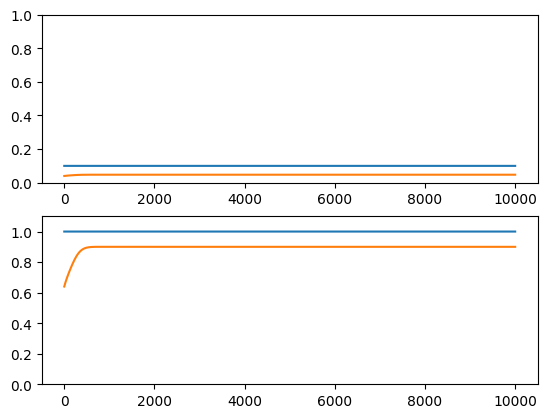

In [416]:
plt.subplot(211)

plt.plot(t,abs(RZ1s))
plt.plot(t,abs(RZ2s))
plt.ylim(0,1)


plt.subplot(212)
plt.plot(t,abs(QZ1s))
plt.plot(t,abs(QZ2s))
plt.ylim(0,1.1)

(0.0, 1.1)

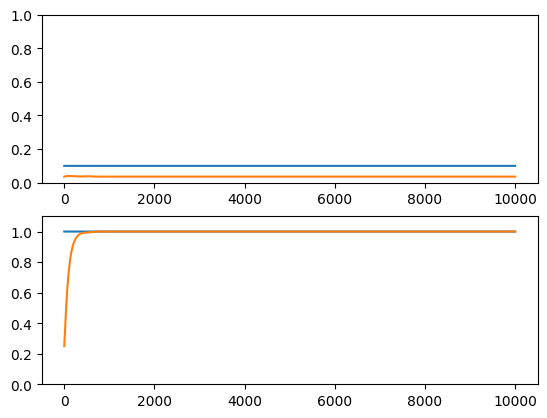

In [448]:
plt.subplot(211)

plt.plot(t,abs(R1))
plt.plot(t,abs(R2))
plt.ylim(0,1)


plt.subplot(212)
plt.plot(t,abs(Q1))
plt.plot(t,abs(Q2))
plt.ylim(0,1.1)